In [1]:
import pandas as pd

In [2]:
file = 'Resources/cleaned_drug_data.csv'

df = pd.read_csv(file)

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,illegal_score_sum,legal_score_sum,illegal_use,legal_use
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,1,0,1,0,3,4,1,1
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,3,0,1
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,1,3,1,1
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,3,0,1
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,1,0,0,3,0,1


In [3]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA', 'illegal_score_sum', 'legal_score_sum',
       'illegal_use', 'legal_use'],
      dtype='object')

In [4]:
#splitting df into test and target data
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',\
         'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]

y = df['illegal_use']


# SVC with All Features Scaled

In [ ]:
X_dummies = pd.get_dummies(X)

In [ ]:
X_dummies

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [ ]:
# scale training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [ ]:
# scale X_test
X_test_scaled = scaler.transform(X_test)


In [ ]:
# train support vector machine

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

In [ ]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report

target_names = ['non-user', 'user']

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

# SVC with only personality, gender, age

In [ ]:
X = df[['Age', 'Gender', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
X_dummies = pd.get_dummies(X)

In [12]:
X = df[['Age', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
X_dummies = pd.get_dummies(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [14]:
# scale training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [15]:
# scale X_test
X_test_scaled = scaler.transform(X_test)

In [16]:
# train support vector machine

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.776


In [18]:
from sklearn.metrics import classification_report

target_names = ['non-user', 'user']

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    non-user       0.77      0.75      0.76       220
        user       0.78      0.80      0.79       249

    accuracy                           0.78       469
   macro avg       0.78      0.77      0.77       469
weighted avg       0.78      0.78      0.78       469



## SVC for Individual Drugs

In [37]:
#splitting df into test and target data
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',\
         'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
X_dummies = pd.get_dummies(X)

In [38]:
drugs = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff',\
         'Cannabis', 'Choc', 'Coke', 'Crack','Ecstasy',\
         'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',\
         'Nicotine', 'VSA']

for drug in drugs:
    y = df[drug]
    
    X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    
    print(drug)
    print(y.value_counts())
    
    print('Test Acc: %.3f' % model.score(X_test, y_test))
    
    target_names = ['non-user', 'user']

    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions,
                            target_names=target_names))
    


Alcohol
1    1741
0     135
Name: Alcohol, dtype: int64
Test Acc: 0.936
              precision    recall  f1-score   support

    non-user       0.00      0.00      0.00        30
        user       0.94      1.00      0.97       439

    accuracy                           0.94       469
   macro avg       0.47      0.50      0.48       469
weighted avg       0.88      0.94      0.91       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Amphet
0    1443
1     433
Name: Amphet, dtype: int64
Test Acc: 0.751
              precision    recall  f1-score   support

    non-user       0.75      1.00      0.86       352
        user       0.00      0.00      0.00       117

    accuracy                           0.75       469
   macro avg       0.38      0.50      0.43       469
weighted avg       0.56      0.75      0.64       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Amyl
0    1744
1     132
Name: Amyl, dtype: int64
Test Acc: 0.925
              precision    recall  f1-score   support

    non-user       0.93      1.00      0.96       434
        user       0.00      0.00      0.00        35

    accuracy                           0.93       469
   macro avg       0.46      0.50      0.48       469
weighted avg       0.86      0.93      0.89       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Benzos
0    1344
1     532
Name: Benzos, dtype: int64
Test Acc: 0.687
              precision    recall  f1-score   support

    non-user       0.69      1.00      0.81       322
        user       0.00      0.00      0.00       147

    accuracy                           0.69       469
   macro avg       0.34      0.50      0.41       469
weighted avg       0.47      0.69      0.56       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Caff
1    1815
0      61
Name: Caff, dtype: int64
Test Acc: 0.955
              precision    recall  f1-score   support

    non-user       0.00      0.00      0.00        21
        user       0.96      1.00      0.98       448

    accuracy                           0.96       469
   macro avg       0.48      0.50      0.49       469
weighted avg       0.91      0.96      0.93       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cannabis
1    991
0    885
Name: Cannabis, dtype: int64
Test Acc: 0.778
              precision    recall  f1-score   support

    non-user       0.79      0.75      0.77       232
        user       0.76      0.81      0.79       237

    accuracy                           0.78       469
   macro avg       0.78      0.78      0.78       469
weighted avg       0.78      0.78      0.78       469

Choc
1    1832
0      44
Name: Choc, dtype: int64
Test Acc: 0.977
              precision    recall  f1-score   support

    non-user       0.00      0.00      0.00        11
        user       0.98      1.00      0.99       458

    accuracy                           0.98       469
   macro avg       0.49      0.50      0.49       469
weighted avg       0.95      0.98      0.96       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Coke
0    1462
1     414
Name: Coke, dtype: int64
Test Acc: 0.770
              precision    recall  f1-score   support

    non-user       0.77      1.00      0.87       361
        user       0.00      0.00      0.00       108

    accuracy                           0.77       469
   macro avg       0.38      0.50      0.43       469
weighted avg       0.59      0.77      0.67       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Crack
0    1797
1      79
Name: Crack, dtype: int64
Test Acc: 0.957
              precision    recall  f1-score   support

    non-user       0.96      1.00      0.98       449
        user       0.00      0.00      0.00        20

    accuracy                           0.96       469
   macro avg       0.48      0.50      0.49       469
weighted avg       0.92      0.96      0.94       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ecstasy
0    1363
1     513
Name: Ecstasy, dtype: int64
Test Acc: 0.770
              precision    recall  f1-score   support

    non-user       0.81      0.89      0.85       342
        user       0.60      0.46      0.52       127

    accuracy                           0.77       469
   macro avg       0.71      0.67      0.68       469
weighted avg       0.76      0.77      0.76       469

Heroin
0    1758
1     118
Name: Heroin, dtype: int64
Test Acc: 0.917
              precision    recall  f1-score   support

    non-user       0.92      1.00      0.96       430
        user       0.00      0.00      0.00        39

    accuracy                           0.92       469
   macro avg       0.46      0.50      0.48       469
weighted avg       0.84      0.92      0.88       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ketamine
0    1670
1     206
Name: Ketamine, dtype: int64
Test Acc: 0.878
              precision    recall  f1-score   support

    non-user       0.88      1.00      0.94       412
        user       0.00      0.00      0.00        57

    accuracy                           0.88       469
   macro avg       0.44      0.50      0.47       469
weighted avg       0.77      0.88      0.82       469



C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Legalh
0    1315
1     561
Name: Legalh, dtype: int64
Test Acc: 0.770
              precision    recall  f1-score   support

    non-user       0.84      0.83      0.84       331
        user       0.61      0.62      0.61       138

    accuracy                           0.77       469
   macro avg       0.72      0.73      0.73       469
weighted avg       0.77      0.77      0.77       469

LSD
0    1500
1     376
Name: LSD, dtype: int64
Test Acc: 0.832
              precision    recall  f1-score   support

    non-user       0.87      0.94      0.90       386
        user       0.54      0.34      0.41        83

    accuracy                           0.83       469
   macro avg       0.70      0.64      0.66       469
weighted avg       0.81      0.83      0.82       469

Meth
0    1557
1     319
Name: Meth, dtype: int64
Test Acc: 0.832
              precision    recall  f1-score   support

    non-user       0.83      1.00      0.91       390
        user       0.00      0.00    

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mushrooms
0    1448
1     428
Name: Mushrooms, dtype: int64
Test Acc: 0.797
              precision    recall  f1-score   support

    non-user       0.84      0.92      0.88       372
        user       0.52      0.32      0.39        97

    accuracy                           0.80       469
   macro avg       0.68      0.62      0.64       469
weighted avg       0.77      0.80      0.78       469

Nicotine
1    1053
0     823
Name: Nicotine, dtype: int64
Test Acc: 0.684
              precision    recall  f1-score   support

    non-user       0.68      0.58      0.62       212
        user       0.69      0.77      0.73       257

    accuracy                           0.68       469
   macro avg       0.68      0.68      0.68       469
weighted avg       0.68      0.68      0.68       469

VSA
0    1783
1      93
Name: VSA, dtype: int64
Test Acc: 0.953
              precision    recall  f1-score   support

    non-user       0.95      1.00      0.98       447
        user       0.00

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualizing Individual Drugs

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


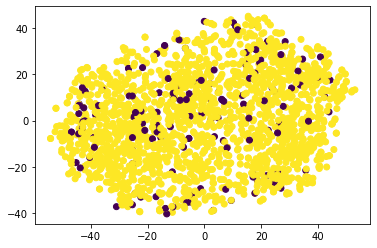

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


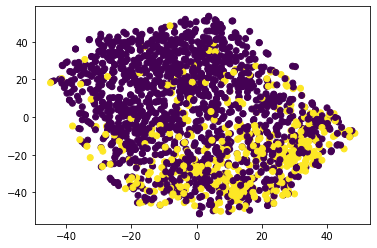

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


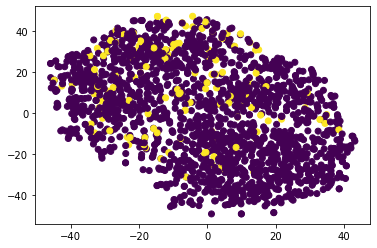

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


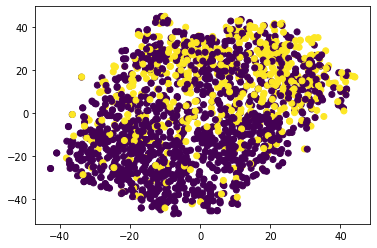

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


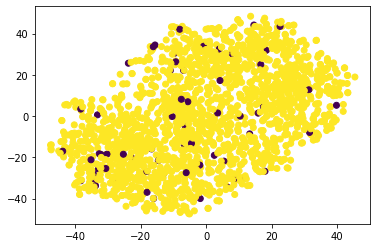

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


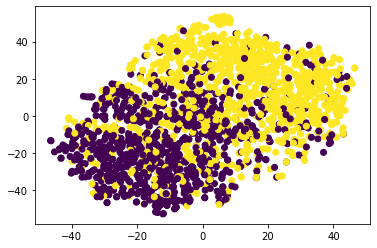

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


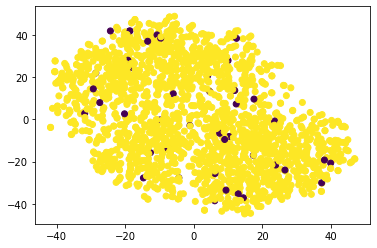

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


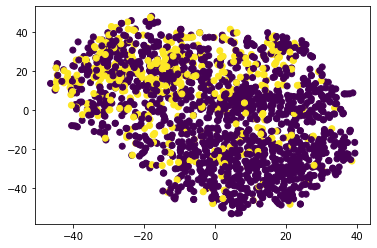

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


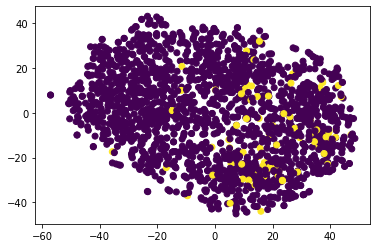

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


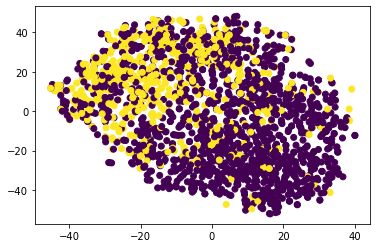

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


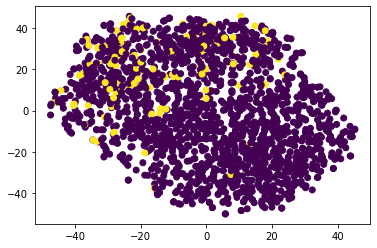

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


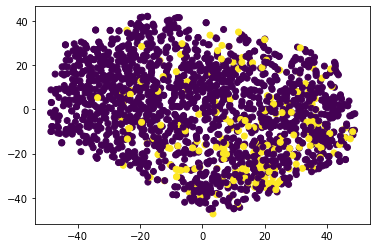

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


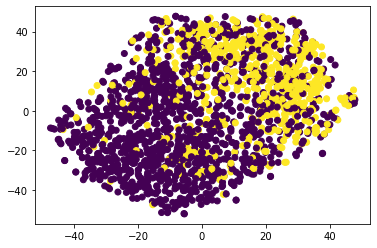

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


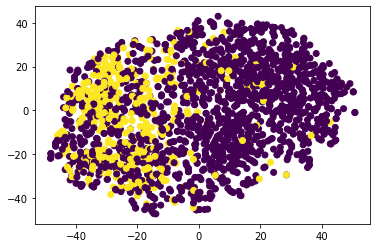

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


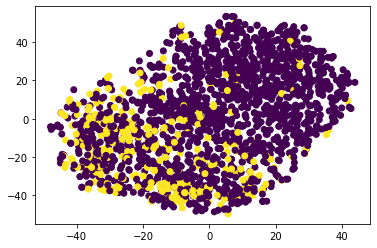

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


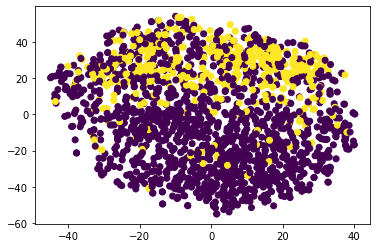

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


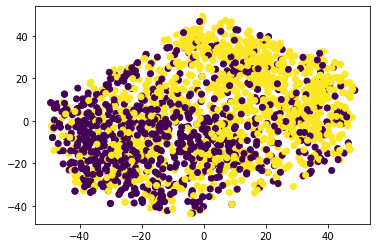

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


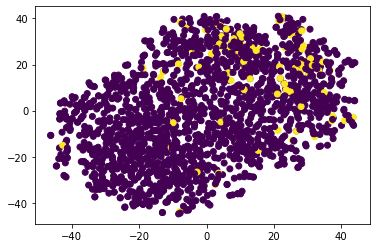

In [39]:
for drug in drugs:
    tsne = TSNE(learning_rate=35)
    X_dummies = pd.get_dummies(X)
    tsne_features = tsne.fit_transform(X_dummies)
    
    # The first column of transformed features
    X_dummies['x'] = tsne_features[:,0]

    # The second column of transformed features
    X_dummies['y'] = tsne_features[:,1]
    
    labels = df[drug]
    
    plt.scatter(X_dummies['x'], X_dummies['y'], c=labels)
    plt.show()

## Visualizing Clusters

In [19]:
 from sklearn.manifold import TSNE
 import matplotlib.pyplot as plt

In [20]:
 # Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [21]:
# Reduce dimensions
X_dummies = pd.get_dummies(X)
tsne_features = tsne.fit_transform(X_dummies)

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [24]:
 # Prepare to plot the dataset

# The first column of transformed features
X_dummies['x'] = tsne_features[:,0]

# The second column of transformed features
X_dummies['y'] = tsne_features[:,1]

In [29]:
labels = y
labels.value_counts()

1    1002
0     874
Name: illegal_use, dtype: int64

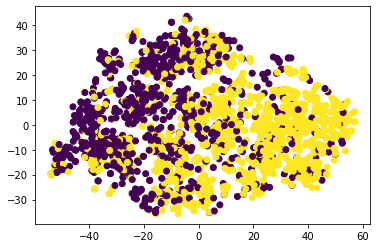

In [30]:
 # Visualize the clusters
plt.scatter(X_dummies['x'], X_dummies['y'], c=labels)
plt.show()